## Experiment 3: Classification with Decision Tree

In this experiment, we will train the binary classifier using Decision Tree.
The steps are:
1.   Load and explore dataset
2.   Data Preparation
3.   Feature Scaling
4.   Data Splitting
5.   Train Decision Tree with Default Hyperparameters
6.   Reduce Overfitting with min_sample_split
7.   Reduce Further Overfitting with max_depth
8.   Assess model on Testing Set

### 1. Load and Explore Dataset

In [86]:
import pandas as pd
import numpy as np

**[1.1]** Loading Dataset

In [87]:
url='https://drive.google.com/file/d/177p-Vaa2__BtaxNCmd4YGBv7zfENUNmy/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = False)

**[1.2]** Dataset Exploration

In [88]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [90]:
print( f" Percentage Null values - 'age_band' : {100 * df['age_band'].isna().sum() / len(df)}" )
print( f" Percentage Null values - 'gender' : {100 * df['gender'].isna().sum() / len(df)}" )

 Percentage Null values - 'age_band' : 85.56233201611123
 Percentage Null values - 'gender' : 52.77111552723147


In [91]:
df[df.duplicated()]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


In [92]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [93]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique())

ID
[     1      2      3 ... 154137 154138 154139]
Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[

### 2. Data Preparation

In [94]:
df_cleaned = df.copy()

In [95]:
## Dropping columns ID, gender and age_band
df_cleaned.drop(['ID','gender', 'age_band'], axis = 1, inplace = True)

In [96]:
#Applying one-hot encoding to the nominal data 'Car_model'
df_car_model = pd.get_dummies(df_cleaned['car_model'])
df_car_model

,model_1,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
131335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### We will map numerical values to the ordinal data under 'car_segment'

In [97]:
ord_cols = ['car_segment']
for col in ord_cols:
  print(col)
  print(df_cleaned[col].unique()) 

car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [98]:
car_segment_mapper = {
    "Other": 0, 
    "LCV": 1, 
    "Small/Medium": 2,
    "Large/SUV": 3
}
car_segment_mapper

{'Other': 0, 'LCV': 1, 'Small/Medium': 2, 'Large/SUV': 3}

In [99]:
df_cleaned["car_segment"] = df_cleaned["car_segment"].replace(car_segment_mapper)
df_cleaned["car_segment"]

0         1
1         2
2         3
3         3
4         2
         ..
131332    3
131333    3
131334    3
131335    3
131336    1
Name: car_segment, Length: 131337, dtype: int64

 #### Merging the encoded data-frame

In [100]:
X = pd.concat([df_cleaned, df_car_model], axis=1)
X.drop('car_model', axis = 1, inplace = True)

In [101]:
y = X.pop('Target')

### 3. Scale Data

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.64100321,  1.23342356, -1.19699048, ..., -0.25750093,
        -0.22712936, -0.08732716],
       [-0.28324066,  0.17830704,  1.5766297 , ..., -0.25750093,
        -0.22712936, -0.08732716],
       [ 1.07452189,  1.23342356,  1.5766297 , ..., -0.25750093,
        -0.22712936, -0.08732716],
       ...,
       [ 1.07452189, -0.52510398, -0.50358543, ..., -0.25750093,
        -0.22712936, -0.08732716],
       [ 1.07452189, -1.22851499, -1.543693  , ..., -0.25750093,
        -0.22712936, -0.08732716],
       [-1.64100321,  0.17830704, -1.543693  , ..., -0.25750093,
        -0.22712936, -0.08732716]])

## 4. Data Splitting

In [103]:
y.value_counts(normalize=True)

0    0.973191
1    0.026809
Name: Target, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

In [106]:
y_test.value_counts(normalize=True)

0    0.971867
1    0.028133
Name: Target, dtype: float64

In [107]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [108]:
y_train.value_counts(normalize=True)

0    0.973494
1    0.026506
Name: Target, dtype: float64

In [109]:
y_val.value_counts(normalize=True)

0    0.973637
1    0.026363
Name: Target, dtype: float64

## 5. Train Decision Tree with Default Hyperparameters

**[5.1]** Import DecisionTreeClassifier from sklearn.tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

**[5.2]** Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent

In [111]:
tree_1 = DecisionTreeClassifier(random_state=8)

**[5.3]** Train the model on the training set



In [112]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

**[5.4]** Save its predictions from the training and validation sets on 2 different variables

In [113]:
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[5.5]** Import the accuracy and f1 scores from sklearn

In [114]:
from sklearn.metrics import accuracy_score, f1_score

**[5.6]** Print the accuracy score of the training and validation sets

In [115]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9999881030277794
0.9876272960883221


**[5.7]** Print the f1 score of the training and validation sets

In [116]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9999881017288889
0.9876272960883221


## 6. Reduce Overfitting with min_samples_split

**[6.1]** Train a DecisionTree model with min_samples_split=5 and save the predictions from the training and validation sets

In [117]:
tree_split_1 = DecisionTreeClassifier(random_state=8, min_samples_split=5).fit(X_train, y_train)
y_train_preds = tree_split_1.predict(X_train)
y_val_preds = tree_split_1.predict(X_val)

**[6.2]** Print the accuracy score of the training and validation sets

In [118]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9979894116947237
0.9889121538022271


**[6.3]** Print the f1 score of the training and validation sets

In [119]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9979708407000927
0.9887670774304218


**[6.4]** Train a DecisionTree model with min_samples_split=10 and save the predictions from the training and validation sets

In [120]:
tree_split_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10).fit(X_train, y_train)
y_train_preds = tree_split_2.predict(X_train)
y_val_preds = tree_split_2.predict(X_val)

**[6.5]** Print the accuracy score of the training and validation sets

In [121]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9957646778894771
0.9904349481298182


**[6.6]** Print the f1 score of the training and validation sets

In [122]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9956788665590679
0.990172845238812


**[6.7]** Train a DecisionTree model with min_samples_split=20 and save the predictions from the training and validation sets

In [123]:
tree_split_3 = DecisionTreeClassifier(random_state=8, min_samples_split=20).fit(X_train, y_train)
y_train_preds = tree_split_3.predict(X_train)
y_val_preds = tree_split_3.predict(X_val)

**[6.8]** Print the accuracy score of the training and validation sets

In [124]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.994027719945274
0.9907204720662416


**[6.9]** Print the f1 score of the training and validation sets

In [125]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9938939015337738
0.9904933860937644


**[6.10]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[6.11]** Print the confusion matrices for the training and validation sets for tree_split_2 model

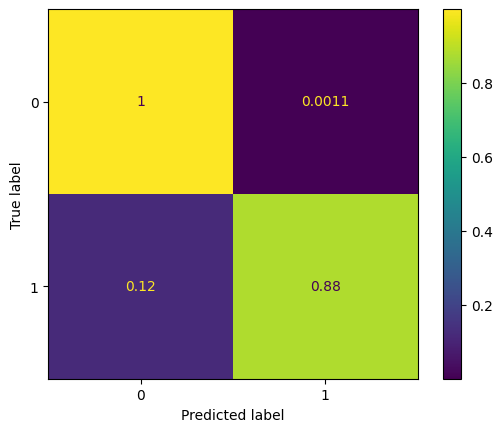

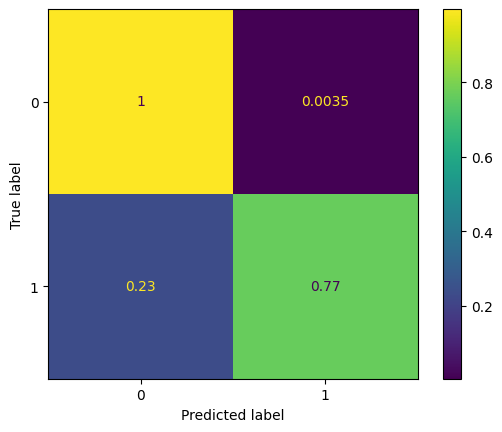

In [127]:
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_val, y_val, normalize='true')

## 7. Reduce Further Overfitting with max_depth

**[7.1]** Let's have a look at what is the current value for this hyperparameter

In [128]:
tree_split_2.tree_.max_depth

21

**[7.2]** Train a DecisionTree model with min_samples_split=10, max_depth=3 and save the predictions from the training and validation sets

In [129]:
tree_depth_1 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=3).fit(X_train, y_train)
y_train_preds = tree_depth_1.predict(X_train)
y_val_preds = tree_depth_1.predict(X_val)

**[7.3]** Print the accuracy score of the training and validation sets bold text

In [130]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9743620248646719
0.9742076710764253


**[7.4]** Print the f1 score of the training and validation sets

In [131]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9636277046157921
0.9633680207041209


**[7.5]** Train a DecisionTree model with min_samples_split=10, max_depth=8 and save the predictions from the training and validation sets

In [132]:
tree_depth_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=8).fit(X_train, y_train)
y_train_preds = tree_depth_2.predict(X_train)
y_val_preds = tree_depth_2.predict(X_val)

**[7.6]** Print the accuracy score of the training and validation sets

In [133]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.988495627862709
0.9879128200247455


**[7.7]** Print the f1 score of the training and validation sets

In [134]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9872705695648534
0.9865789809197011



**[7.8]** Train a DecisionTree model with min_samples_split=10, max_depth=6 and save the predictions from the training and validation sets

In [135]:
tree_depth_3 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=6).fit(X_train, y_train)
y_train_preds = tree_depth_3.predict(X_train)
y_val_preds = tree_depth_3.predict(X_val)

**[7.9]** Print the accuracy score of the training and validation sets

In [136]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9852953423353756
0.9845817074331398


**[7.10]** Print the f1 score of the training and validation sets

In [137]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9842509095473427
0.9835813881486359


This is the best model with not much overfitting

**[7.11]** Print the confusion matrices for the training and validation sets for tree_depth_3 model

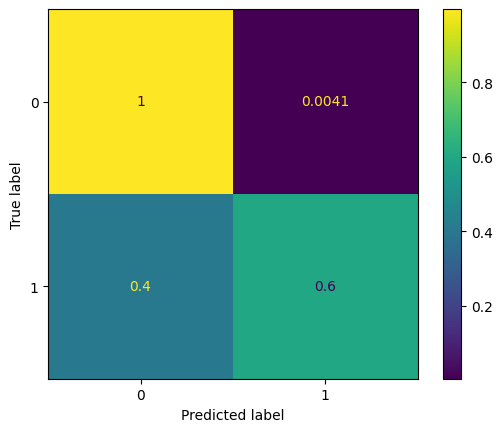

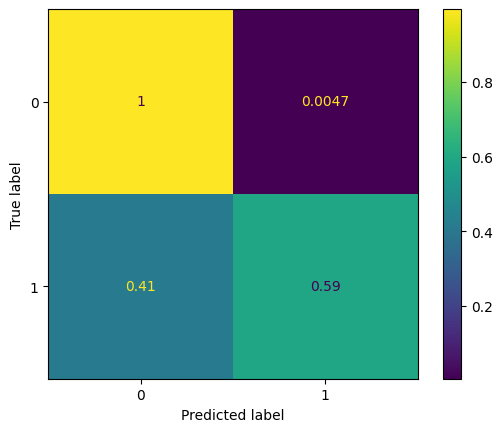

In [138]:
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_val, y_val, normalize='true')

## 8. Assess model on Testing Set

**[8.1]** Print the accuracy and f1 scores of our best model on the testing set

In [139]:
y_test_preds = tree_depth_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9847342774478453
0.9836432570935251


**[8.2]** Print the confusion matrix for this model on the testing set

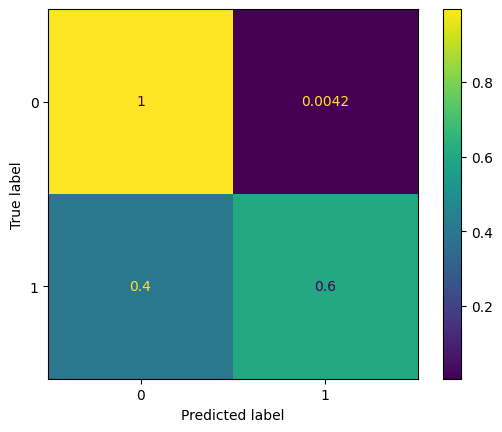

In [140]:
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_test, y_test, normalize='true')